In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random
import pathlib

In [ ]:
# Check for GPU availability
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print('GPU is available')
else:
    print('No GPU detected')

num_gpus = len(physical_devices)

if num_gpus > 0:
    print(f"Number of available GPUs: {num_gpus}")
    for i in range(num_gpus):
        print(f"GPU {i}: {tf.config.experimental.get_device_details(physical_devices[0])}")
else:
    print("No GPUs available")

device = tf.device('gpu:0' if len(physical_devices) > 0 else 'cpu:0')


GPU is available
Number of available GPUs: 1
GPU 0: {'device_name': 'NVIDIA GeForce RTX 3060', 'compute_capability': (8, 6)}


In [ ]:
import os
os.getcwd()

'd:\\Balanced Augmented Covid CXR Dataset'

In [ ]:
data_dir = 'd:\\Balanced Augmented Covid CXR Dataset\\Dataset'
os.listdir(data_dir)

['COVID', 'Lung opacity', 'Normal', 'Viral Pneumonia']

In [ ]:
tf.random.set_seed(42)

train_data = keras.utils.image_dataset_from_directory(data_dir, validation_split = 0.1, subset = 'training', seed = 1, shuffle = True, batch_size = 32, image_size=(256,256))

test_data = keras.utils.image_dataset_from_directory(data_dir, validation_split = 0.1, subset = 'validation', seed = 1, shuffle = True, batch_size = 32, image_size=(256,256))

Found 29998 files belonging to 4 classes.
Using 26999 files for training.
Found 29998 files belonging to 4 classes.
Using 2999 files for validation.


In [ ]:
filenames = pathlib.Path(data_dir)
for label in train_data.class_names :
    images = list(filenames.glob(f'{label}/*'))
    print(f'{label} : {len(images)}')

COVID : 8745
Lung opacity : 7674
Normal : 8214
Viral Pneumonia : 5365


In [ ]:
train_data.cardinality().numpy(),  test_data.cardinality().numpy()

(844, 94)

In [ ]:
train_set = train_data.take(700)
val_set = train_data.skip(700)

In [ ]:
train_set.cardinality().numpy(), val_set.cardinality().numpy()

(700, 144)

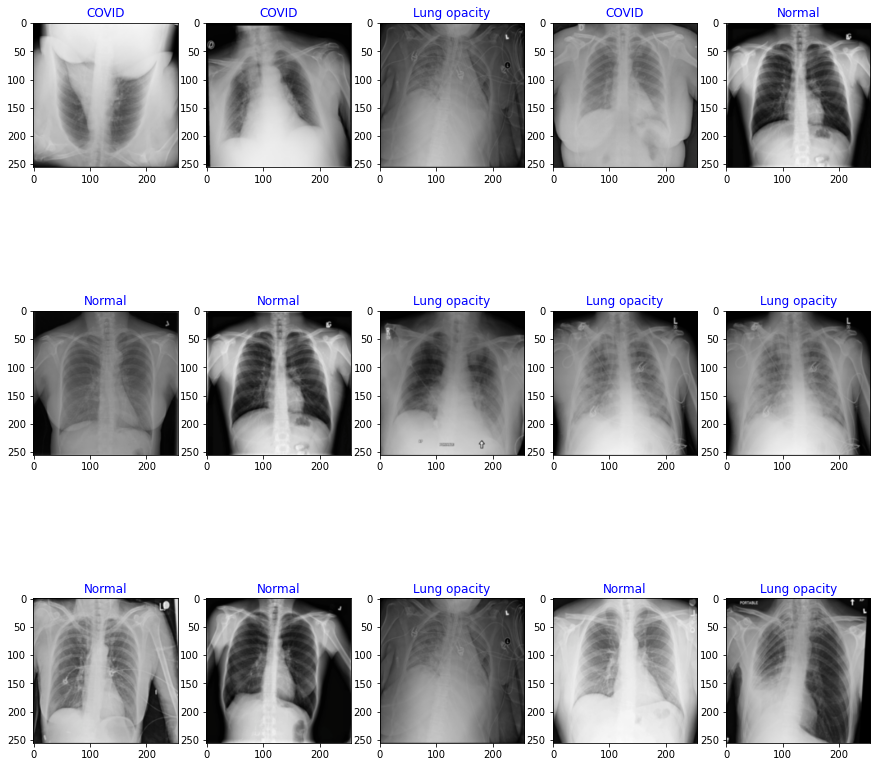

In [ ]:
# print random images from the train set
plt.figure(figsize = (15, 15))
for images, labels in train_set.take(1):
    for i in range(15):
        index = random.randint(0, len(images))
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[index].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[index]], color= 'blue', fontsize= 12)
        plt.axis(True)
plt.show()

In [ ]:
for images_batch, labels_batch in train_set:
    print(images_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


In [ ]:
from tensorflow.keras import layers

In [ ]:
tf.random.set_seed(42)

model = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(128,(3,3), activation='relu', input_shape=(256,256,3)), # Hidden Layer 1
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(64,(3,3), activation='relu'), # Hidden Layer 2
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(32,(3,3), activation='relu'), # Hidden Layer 3
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Flatten(), # Output layer
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(4, activation='softmax')
])


In [ ]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(), optimizer = keras.optimizers.Adam(), metrics = 'accuracy')

In [ ]:
'''
model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='softmax'))
'''

"\nmodel.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(256,256,3)))\nmodel.add(MaxPooling2D())\nmodel.add(Conv2D(32, (3,3), 1, activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Conv2D(16, (3,3), 1, activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Flatten())\nmodel.add(Dense(256, activation='relu'))\nmodel.add(Dense(1, activation='softmax'))\n"

In [ ]:
'''
# Hidden Layer 1
model.add(Conv2D(128,(3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Hidden Layer 2
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Hidden Layer 3
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Output layer
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))
'''

"\n# Hidden Layer 1\nmodel.add(Conv2D(128,(3,3), activation='relu', input_shape=(256,256,3)))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n# Hidden Layer 2\nmodel.add(Conv2D(64,(3,3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n# Hidden Layer 3\nmodel.add(Conv2D(32,(3,3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n# Output layer\nmodel.add(Flatten())\nmodel.add(Dropout(0.5))\nmodel.add(Dense(128,activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(64,activation='relu'))\nmodel.add(Dropout(0.25))\nmodel.add(Dense(4, activation='softmax'))\n"

In [ ]:
history_1 = model.fit(train_set, epochs=20, validation_data=val_set)

Epoch 1/20
700/700 [==============================] - 82s 114ms/step - loss: 0.8791 - accuracy: 0.6219 - val_loss: 0.5154 - val_accuracy: 0.7873
Epoch 2/20
700/700 [==============================] - 78s 111ms/step - loss: 0.5214 - accuracy: 0.7992 - val_loss: 0.3362 - val_accuracy: 0.8661
Epoch 3/20
700/700 [==============================] - 78s 111ms/step - loss: 0.3847 - accuracy: 0.8535 - val_loss: 0.2542 - val_accuracy: 0.8998
Epoch 4/20
700/700 [==============================] - 83s 118ms/step - loss: 0.3145 - accuracy: 0.8820 - val_loss: 0.2276 - val_accuracy: 0.9163
Epoch 5/20
700/700 [==============================] - 93s 133ms/step - loss: 0.2607 - accuracy: 0.9046 - val_loss: 0.1933 - val_accuracy: 0.9300
Epoch 6/20
700/700 [==============================] - 87s 124ms/step - loss: 0.2253 - accuracy: 0.9159 - val_loss: 0.1413 - val_accuracy: 0.9537
Epoch 7/20
700/700 [==============================] - 78s 111ms/step - loss: 0.1902 - accuracy: 0.9309 - val_loss: 0.1284 - val_ac

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0

In [ ]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2)
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

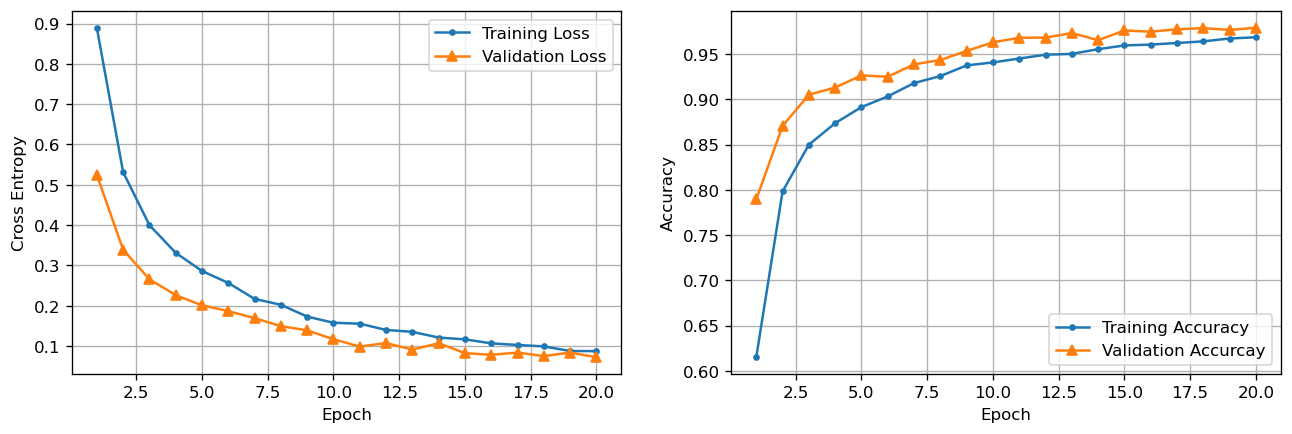

In [ ]:
plot_training_curves(pd.DataFrame(history_1.history))

In [ ]:
X_test, y_test = None, None
for images, labels in test_data.take(100):
    if X_test == None or y_test == None:
        X_test = images
        y_test = labels
    else:
        X_test = tf.concat([X_test, images], axis = 0)
        y_test = tf.concat([y_test, labels], axis = 0)

X_test.shape, y_test.shape

(TensorShape([2999, 256, 256, 3]), TensorShape([2999]))

In [ ]:
from sklearn import metrics

In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.9846615538512837

In [ ]:
train_score = model.evaluate(train_data, verbose= 1)
test_score = model.evaluate(test_data, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*****************************')
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

94/94 [==============================] - 3s 33ms/step - loss: 0.0568 - accuracy: 0.9847
Train Loss:  0.02095332182943821
Train Accuracy:  0.9947775602340698
*****************************
Test Loss:  0.05681130662560463
Test Accuracy:  0.9846615791320801


In [ ]:
from sklearn.metrics import classification_report
target_names = ['COVID', 'Lung opacity', 'Normal', 'Viral Pneumonia']
print(classification_report(y_test , y_pred, target_names=target_names))

                 precision    recall  f1-score   support

          COVID       0.99      1.00      0.99       914
   Lung opacity       0.98      0.97      0.97       745
         Normal       0.97      0.98      0.97       796
Viral Pneumonia       1.00      1.00      1.00       544

       accuracy                           0.98      2999
      macro avg       0.99      0.99      0.99      2999
   weighted avg       0.98      0.98      0.98      2999



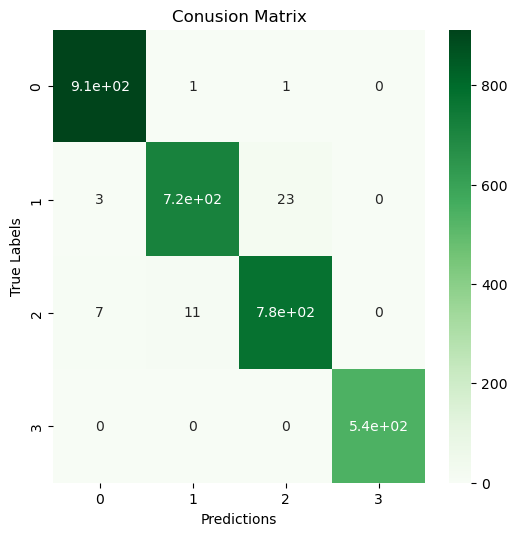

In [ ]:
import seaborn as sns
plt.figure(figsize = (6,6), dpi = 100)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, cmap = 'Greens')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Conusion Matrix')
plt.show()

In [ ]:
# plot random images from a given dataset, and compare predictions with ground truth
def plot_random_predictions(dataset, model):

    shuffled_data = dataset.shuffle(10)
    class_names = dataset.class_names

    for images, labels in shuffled_data.take(1):
        plt.figure(figsize = (10, 10), dpi = 120)
        y_pred_proba = model.predict(images)

    for i in range(9):
        index = random.randint(0, len(images))
        ax = plt.subplot(3,3, i + 1)

        img = images[index].numpy().astype("uint8")
        y_true = class_names[labels[index]]
        y_pred = class_names[np.argmax(y_pred_proba[index], axis = 0)]

        c = 'g' if y_pred == y_true else 'r'

        plt.imshow(img)
        plt.title(f'Predicted : {y_pred}\nTrue label : {y_true}', c = c)
        plt.axis(False)

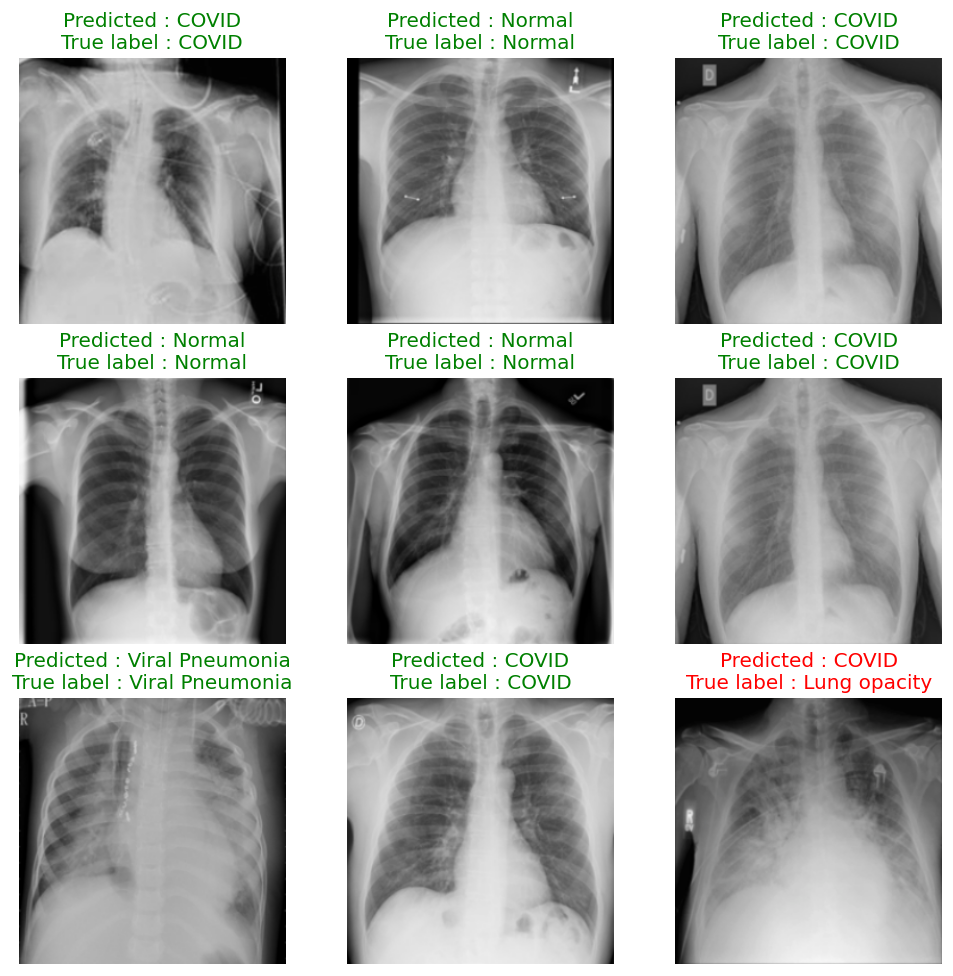

In [ ]:
plot_random_predictions(test_data, model)

In [ ]:
# Save the model
model.save(os.path.join('Model','cnnModel.h5'))